# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_regression

# linear models regression
from sklearn.linear_model import LinearRegression, Ridge
## metrics regression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score, cross_validate

import warnings
import importlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
def compute_metrics_regression(y, y_pred):
    mse = mean_squared_error(y, y_pred, squared=True) #mse
    rmse = mean_squared_error(y, y_pred, squared=False) #rmse    
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    # prevent infinite by cause of negativiy
    msle = None
    rmsle = None
    if (np.min(y) >=0)*(np.min(y_pred)>=0):
        msle = mean_squared_log_error(y, y_pred, squared=True) #msle    
        rmsle = mean_squared_log_error(y, y_pred, squared=False) #rmsle    
    return {'mse':mse, 'rmse':rmse, 'mae':mae, 'mape':mape, 'msle':msle, 'rmsle':msle}
    
def plot_results(y_train, y_train_pred, y_test, y_test_pred, figsize=[20,8]):
    df_result_train_plot = pd.DataFrame(np.hstack([y_train, y_train_pred]))
    df_result_train_plot.columns = ['train', 'train_pred']

    df_result_test_plot = pd.DataFrame(np.hstack([y_test, y_test_pred]))
    df_result_test_plot.columns = ['test', 'test_pred']
    
    fig, ax = plt.subplots(1, 2) #figsize=[50,16])
    df_result_train_plot.plot(style='.', figsize=figsize, ax=ax[0])
    ax[0].set_xlabel('index')
    ax[0].set_ylabel('target')
    df_result_test_plot.plot(style='.-', figsize=figsize, ax=ax[1])    
    ax[1].set_xlabel('index')
    ax[1].set_ylabel('target')
    
def plot_two_num_variables(df, column_x, column_y, show_distrib=False):    
    if show_distrib:
        sns.jointplot(df.loc[:,column_x], df.loc[:,column_y], kind="reg")
    else:
        df[[column_x, column_y]].plot.scatter(x=column_x, y=column_y,  ylim=(0,800000))    
    

## 1. Training data for linear regression

### $$\{\pmb{x_i}, y_i\}_{i=1}^N~~;~~\pmb{x_i}\in R^D, y_i\in R$$

In [120]:
df_train, df_target = make_regression(
    n_samples = 1000,
    n_features=20, 
    n_informative=1,
    bias=0.5,        
    random_state=42,
    noise = 50,#0.9,
    tail_strength = 50#0.7
)

df_train = pd.DataFrame(df_train)
df_train.columns = ['fea_'+str(i) for i in range(df_train.shape[1])]

df_target = pd.DataFrame(df_target)
df_target.columns = ['target']

df_train = df_train.fillna(0.0)
df_target = df_target.fillna(0.0)
print("size, train/test: ", df_train.shape, df_target.shape)

size, train/test:  (1000, 20) (1000, 1)


,fea_0,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,fea_12,fea_13,fea_14,fea_15,fea_16,fea_17,fea_18,fea_19
0,1.381295,0.297865,0.211759,-0.694525,-1.003170,-1.721798,-0.589831,0.159323,0.149840,1.561865,0.616848,0.867924,-1.362213,0.028756,-1.492006,-1.019821,-2.083824,-1.938582,-1.092188,0.506445
1,-0.189535,-1.872082,0.189381,-0.073534,-0.444340,0.359254,-1.468953,-1.574371,-0.851526,0.422706,0.741190,1.168412,0.418809,-0.922225,-0.043988,-0.479527,-0.030906,0.677747,-1.233895,0.784668
2,1.777261,1.323468,-1.241968,0.240836,-1.000856,0.088721,0.454016,-1.922270,1.292501,-0.447022,0.097381,-1.342028,-2.514374,0.125992,-0.717735,-1.549931,1.435662,-0.214029,1.042110,1.131260
3,1.330514,-0.249433,-0.605221,1.887975,-1.395991,-0.674389,-0.797808,-0.982655,-1.830644,-2.019760,0.397204,2.609611,-2.033628,-0.837268,0.093489,-0.376556,-1.268216,0.575479,-0.144712,-0.106106
4,-0.089259,-0.542448,0.757407,1.379430,-1.168477,2.329806,2.262167,0.870206,0.548860,-0.833989,-0.241712,-1.233367,2.319903,-0.813790,0.866473,-0.420129,0.799371,-0.908120,-1.060997,-0.122564


,target
0,-65.639642
1,111.005700
2,-25.541552
3,39.644365
4,-12.169370


Text(0, 0.5, 'target')

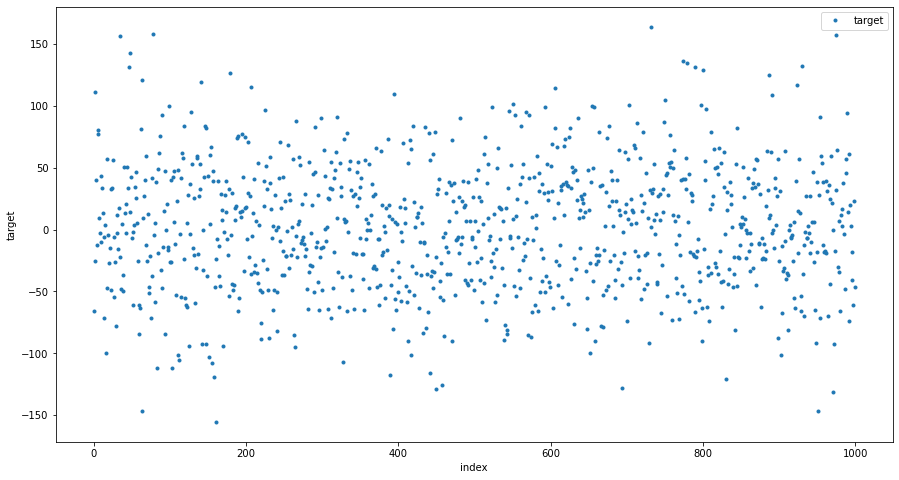

In [121]:
display(df_train.head())
display(df_target.head())

fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
df_target.plot(style='.', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_target, test_size=0.1, random_state=0)

Text(0, 0.5, 'target')

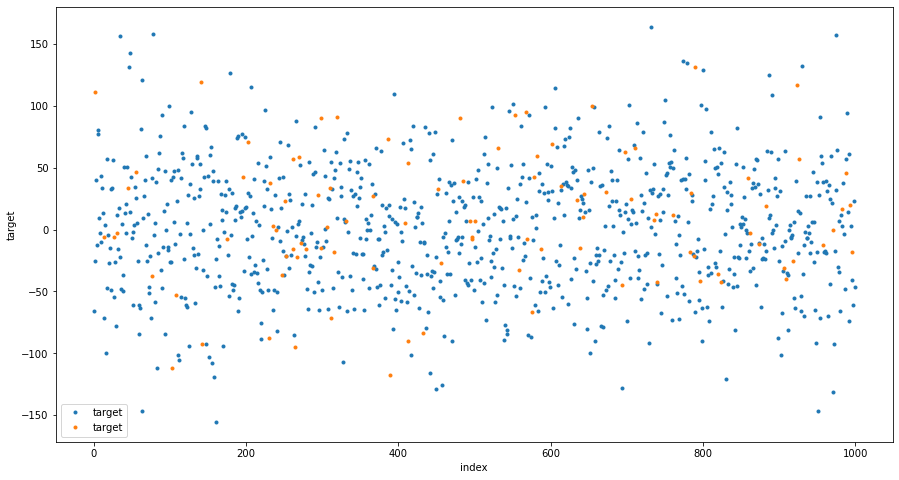

In [123]:
fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
Y_train.plot(style='.', figsize=figsize, ax=ax)
Y_test.plot(style='.', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

# 2. Preprocesamiento:  Feature scaling
* Remover la media~(media=0) 
* Escalar la variance~(var=1)

In [124]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

((900, 20), (100, 20))

In [125]:
X_test_scaled.columns

Index(['fea_0', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11', 'fea_12', 'fea_13', 'fea_14',
       'fea_15', 'fea_16', 'fea_17', 'fea_18', 'fea_19'],
      dtype='object')

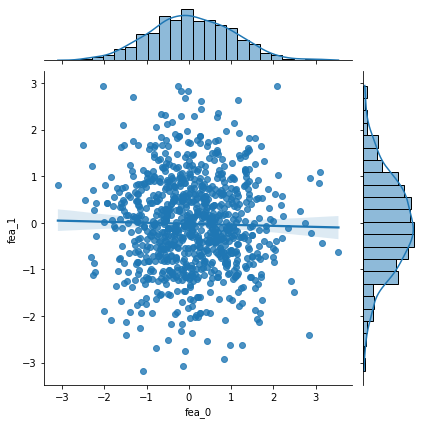

In [126]:
plot_two_num_variables(X_train, column_x='fea_0', column_y='fea_1', show_distrib=True)

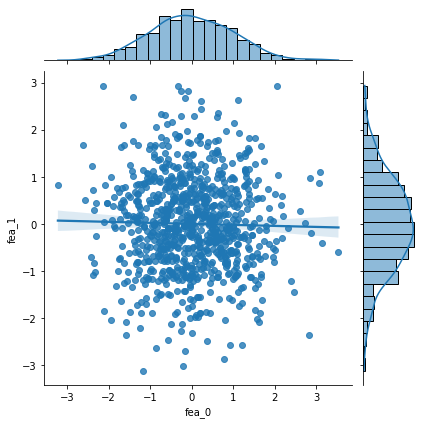

In [127]:
plot_two_num_variables(X_train_scaled, column_x='fea_0', column_y='fea_1', show_distrib=True)

# 2. Model

## Approximated function: 
## $$f(\pmb{x_i}, \pmb{\theta}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Dx_D \in R~;~\pmb{\theta} \in R^{D+1}$$

# 3. Entrenamiento
## Loss function
## $$L(\pmb{\theta}) = \frac{1}{N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 \in R$$

## Encontrar $\hat{\pmb{\theta}}$ que minimize $L(\hat{\pmb{\theta}})$

## Method 1: $df/dx=0$

In [128]:
## Linear regression closed form solution by df/dx=0
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

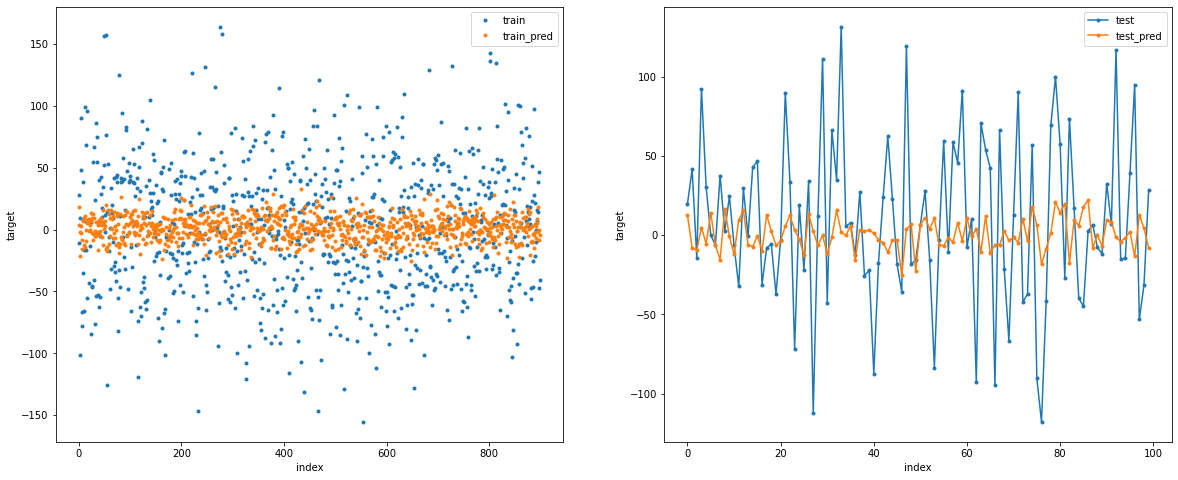

In [131]:
plot_results(Y_train, y_train_predict, Y_test, y_test_predict)

### Metrics for regression

In [132]:
# Y_train = Y_train
y_train_predict = y_train_predict.reshape(-1)

# Y_test = Y_test
y_test_predict = y_test_predict.reshape(-1)

dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae,mape,msle,rmsle
train,2421.720665,49.210981,39.315849,1.386215,None,None
test,2847.350664,53.360572,41.129754,1.802733,None,None


## Method 2: Linear regression usando SGD

### Loss function
### $$L_{ridge}(\pmb{\theta}) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 + \alpha\sum_{j=1}^p \theta_j^2$$

### Stochastic Gradient Descent (SGD)    
$$\text{Init}~\pmb{\theta}~ \text{with random values}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$
$$\text{Repeat until converge~(by some criterion)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$
$$\text{Randomly sampling a } mbatch \text{ from } \{\pmb{x_i}, y_i\}_{i=1}^N$$

$$\pmb{\theta} = \pmb{\theta} - \alpha\nabla_{\pmb{\theta}} \frac{1}{2|mbatch|}\displaystyle\sum_{\{\pmb{x_i},y_i\}\in mbatch} (y_i - f(\pmb{x_i}, \pmb{\theta}))^2$$    

In [133]:
from sklearn.linear_model import SGDRegressor

30
[ 1.0680501  -0.81200509  1.51710212 -0.11552648  0.61605511  0.21115828
  1.16729473  0.25388423 -0.05459864  0.35788819 -0.93907426 -0.10304453
  0.52346111 -0.02103245  0.08884407  0.52173903  2.64574954  0.68322868
  0.24437987  0.67356024]


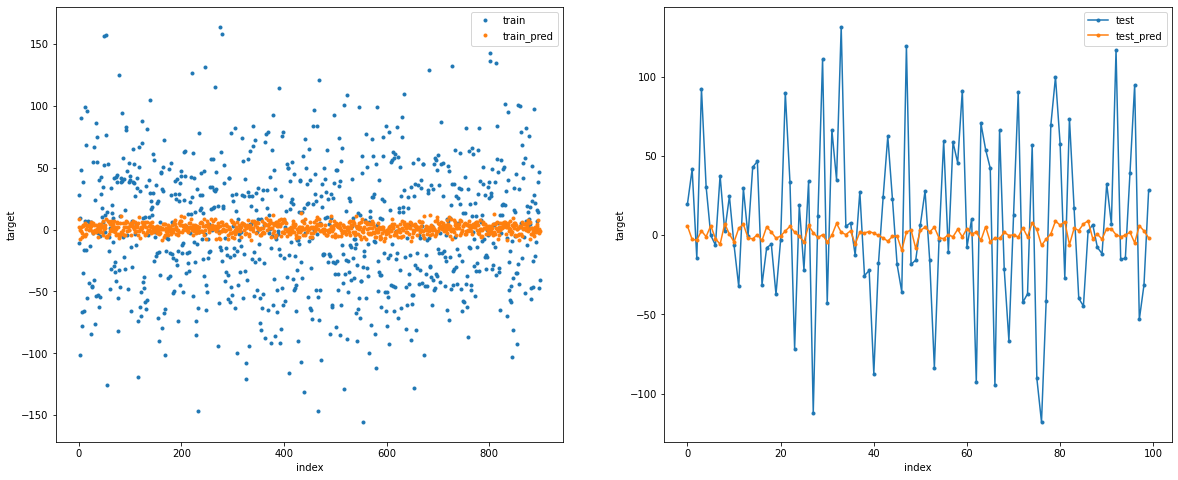

In [138]:
## Default
loss_function = 'squared_error'
learning_rate_method = 'constant'#'adaptive'#'invscaling'#'constant'
learning_rate = 0.0001

reg_method = 'l2'
alpha = 1.5

shuffle_each_epoch = True

model = SGDRegressor(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                     penalty=reg_method, alpha=alpha, 
                     shuffle=shuffle_each_epoch, 
                     random_state=0, max_iter=1000, tol=1e-3)
model.fit(X_train_scaled, Y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

print(model.n_iter_)
print(model.coef_)
plot_results(Y_train, y_train_predict.reshape(-1,1), Y_test, y_test_predict.reshape(-1,1))

In [140]:
dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae,mape,msle,rmsle
train,2456.436972,49.562455,39.737771,1.143736,None,None
test,2783.297384,52.756965,40.931563,1.277560,None,None
